## Outliers

In [ ]:
Outliers: Data points which are far from observed values
    
unusual data points that differs significantly from other data points

In [1]:
import numpy as np
import pandas as pd

In [2]:
array=np.array([20,24,23,25,22,21,28,27,30,24,28,26])  #20 to 30
array

array([20, 24, 23, 25, 22, 21, 28, 27, 30, 24, 28, 26])

In [ ]:

                    salary(50000-100000)
bankstatement1      50000    55000
bankstatement2      60000
bankstatement3      800000
bankstatement4      70000
bankstatement5      65000
bankstatement6      75000

In [ ]:
array=np.array([20,24,23,25,222,21,28,27,300,24,28,26])  #20 to 30
array

## How Outliers are introduced in Datasets

In [ ]:
1. Data Entry Error (data labelling team)
2. Intentional Errors
3. Instrumental Error
4. Natural Error 
5. Sampling Error (mixing data from wrong sources)

## How to Detect Outlier

In [ ]:
1. Z-score (normally distributed data)
2. IQR Method (skwed data)
3. Boxplot
4. Scatter Plot

## How to Handle outlier

In [ ]:
1. Delete Observation
2. Imputation Technique:
    1. Median
    2. mean
    3. minumum value
    4. maximum value
    5. upper_tail
    6. lower_tail
    7. static value
    
3. Transformation Techniques:
    1. Log Transformation
    2. Square root transformation
    3. Cube root transformation
    4. Reciprocal Transformation
    5. Standardization

# Impact of Outliers on ML Algorithms

# 1. Sensitive to Outliers

In [ ]:
1. Linear Regression
2. Logistic Regression
3. K-nearest Neighbour
4. Support Vector Machine
5. K-Means clustering

# 2. Not sensitive to outliers

In [ ]:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boosting
5. XGBoost
6. Naive Bayes

### 1. z-score method

In [3]:
from scipy.stats import zscore,skew
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.randint(20,31,size=15)

array([21, 24, 25, 25, 21, 21, 25, 25, 30, 28, 23, 25, 29, 27, 23])

In [5]:
array1=np.array([27, 26, 28, 28, 28, 30, 26, 24, 27, 23, 24, 26, 30, 23, 29])
array1

array([27, 26, 28, 28, 28, 30, 26, 24, 27, 23, 24, 26, 30, 23, 29])

In [6]:
array2=np.array([27, 26, 28, 28, 28, 300, 26, 24, 27, 23, 24, 26, 30, 23, 29])
array2

array([ 27,  26,  28,  28,  28, 300,  26,  24,  27,  23,  24,  26,  30,
        23,  29])

<AxesSubplot:ylabel='Density'>

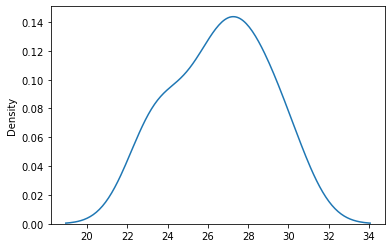

In [7]:
sns.kdeplot(array1)

In [8]:
skew(array1)

-0.16686151611463723

<AxesSubplot:ylabel='Density'>

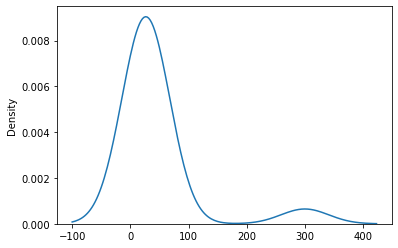

In [9]:
sns.kdeplot(array2)

In [10]:
skew(array2)

3.468958857671187

In [ ]:
z=(X-Xmean)/std

In [11]:
array1=np.array([27, 26, 28, 28, 28, 30, 26, 24, 27, 23, 24, 26, 30, 23, 29])
array1

array([27, 26, 28, 28, 28, 30, 26, 24, 27, 23, 24, 26, 30, 23, 29])

In [12]:
mean=np.mean(array1)
mean

26.6

In [13]:
std=np.std(array1)
std

2.244994432064365

In [14]:
mean + 3*std

33.334983296193094

In [15]:
mean - 3*std

19.86501670380691

In [16]:
z_score_27=(27-mean)/std
z_score_27

0.17817416127494895

In [17]:
z_score_30=(30-mean)/std
z_score_30

1.5144803708370709

In [18]:

z_score_values=np.abs(zscore(array1))
z_score_values

array([0.17817416, 0.26726124, 0.62360956, 0.62360956, 0.62360956,
       1.51448037, 0.26726124, 1.15813205, 0.17817416, 1.60356745,
       1.15813205, 0.26726124, 1.51448037, 1.60356745, 1.06904497])

In [19]:
array2=np.array([27, 26, 28, 28, 28, 300, 26, 24, 27, 23, 24, 26, 30, 23, 29])
array2

array([ 27,  26,  28,  28,  28, 300,  26,  24,  27,  23,  24,  26,  30,
        23,  29])

In [20]:
z_score_values=np.abs(zscore(array2))
print(z_score_values)
outlier_index=np.where(z_score_values > 1.5)[0]
outlier_list=array2[outlier_index]
outlier_list

[0.25772673 0.2723703  0.24308317 0.24308317 0.24308317 3.73996636
 0.2723703  0.30165743 0.25772673 0.31630099 0.30165743 0.2723703
 0.21379604 0.31630099 0.22843961]


array([300])

## 2. IQR Method

In [21]:
from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston.data, columns= boston.feature_names)
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [23]:
q1 =25%
q2 = 50% (median)
q3= 75 %

iqr= q3- q1
upper_tail= q3 + 1.5 * iqr
lower_tail= q1 - 1.5 * iqr

SyntaxError: invalid syntax (<ipython-input-23-926238ea3378>, line 1)

In [24]:
q1=df['AGE'].quantile(0.25)
q2=df['AGE'].quantile(0.5)
q3=df['AGE'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 1.5 * iqr
lower_tail= q1 - 1.5 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 45.025
Q2 is : 77.5
Q3 is : 94.07499999999999
UpperTail is: 167.64999999999998
LowerTail is: -28.54999999999999


<AxesSubplot:>

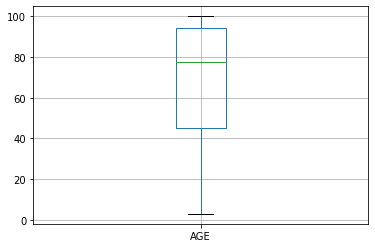

In [25]:
df[['AGE']].boxplot()

In [26]:
# plt.figure(figsize=(20,20))
# df.boxplot()

In [27]:
q1=df['DIS'].quantile(0.25)
q2=df['DIS'].quantile(0.5)
q3=df['DIS'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 1.5 * iqr
lower_tail= q1 - 1.5 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 2.100175
Q2 is : 3.2074499999999997
Q3 is : 5.1884250000000005
UpperTail is: 9.820800000000002
LowerTail is: -2.5322000000000005


<AxesSubplot:>

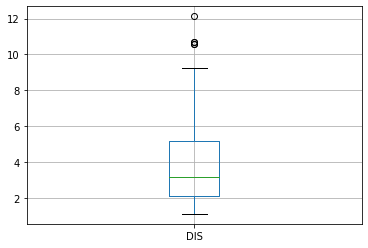

In [32]:
df[['DIS']].boxplot()

<AxesSubplot:xlabel='DIS'>

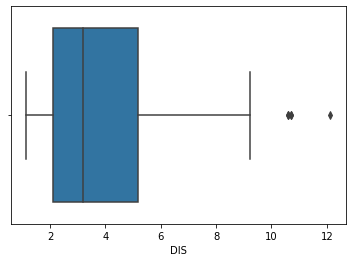

In [29]:
sns.boxplot(x=df['DIS'])

In [34]:
df[['DIS']].loc[df['DIS']< lower_tail]

,DIS


In [33]:
df[['DIS']].loc[df['DIS']> upper_tail]

,DIS
351,10.7103
352,10.7103
353,12.1265
354,10.5857
355,10.5857


In [35]:
q1=df['DIS'].quantile(0.25)
q2=df['DIS'].quantile(0.5)
q3=df['DIS'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 2 * iqr
lower_tail= q1 - 2 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 2.100175
Q2 is : 3.2074499999999997
Q3 is : 5.1884250000000005
UpperTail is: 11.364925000000001
LowerTail is: -4.076325000000001


In [36]:
df[['DIS']].loc[df['DIS']> upper_tail]

,DIS
353,12.1265


In [37]:
# to detect extreme outlier
q1=df['DIS'].quantile(0.25)
q2=df['DIS'].quantile(0.5)
q3=df['DIS'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 3 * iqr
lower_tail= q1 - 3 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 2.100175
Q2 is : 3.2074499999999997
Q3 is : 5.1884250000000005
UpperTail is: 14.453175000000002
LowerTail is: -7.164575000000001


In [38]:
df[['DIS']].loc[df['DIS']> upper_tail]

,DIS


In [40]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Fare'>

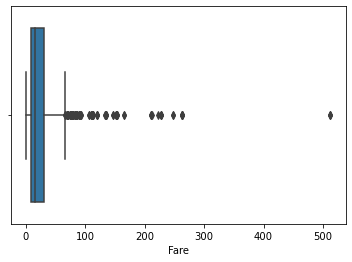

In [41]:
sns.boxplot(x=titanic_df['Fare'])

In [42]:
# to detect extreme outlier
q1=titanic_df['Fare'].quantile(0.25)
q2=titanic_df['Fare'].quantile(0.5)
q3=titanic_df['Fare'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 3 * iqr
lower_tail= q1 - 3 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0
UpperTail is: 100.2688
LowerTail is: -61.358399999999996


In [44]:
titanic_df[['Fare']].loc[titanic_df['Fare']> upper_tail].shape

(53, 1)

# How to Handle outlier

### 1. Delete Data

In [51]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
# to detect extreme outlier
q1=titanic_df['Fare'].quantile(0.25)
q2=titanic_df['Fare'].quantile(0.5)
q3=titanic_df['Fare'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 3 * iqr
lower_tail= q1 - 3 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0
UpperTail is: 100.2688
LowerTail is: -61.358399999999996


In [53]:
titanic_df[['Fare']].loc[titanic_df['Fare']> upper_tail].shape

(53, 1)

In [55]:
titanic_df=titanic_df.loc[(titanic_df['Fare']<= upper_tail)& 
                          (titanic_df['Fare']>= lower_tail)]
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Imputation Methods

In [65]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
# to detect extreme outlier
q1=titanic_df['Fare'].quantile(0.25)
q2=titanic_df['Fare'].quantile(0.5)
q3=titanic_df['Fare'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 3 * iqr
lower_tail= q1 - 3 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0
UpperTail is: 100.2688
LowerTail is: -61.358399999999996


### 1. Imputation by Median value

In [58]:
titanic_df['Fare'].mean()

32.2042079685746

In [59]:
titanic_df['Fare'].median()

14.4542

In [68]:
median_fare=titanic_df.loc[(titanic_df['Fare']<= upper_tail)& 
                          (titanic_df['Fare']>= lower_tail),'Fare'].median()
median_fare

13.0

In [67]:
titanic_df.loc[(titanic_df['Fare']> upper_tail)| 
                          (titanic_df['Fare']< lower_tail),'Fare']

27     263.0000
31     146.5208
88     263.0000
118    247.5208
195    146.5208
215    113.2750
258    512.3292
268    153.4625
269    135.6333
297    151.5500
299    247.5208
305    151.5500
306    110.8833
307    108.9000
311    262.3750
318    164.8667
319    134.5000
325    135.6333
332    153.4625
334    133.6500
337    134.5000
341    263.0000
373    135.6333
377    211.5000
380    227.5250
390    120.0000
393    113.2750
435    120.0000
438    263.0000
498    151.5500
505    108.9000
527    221.7792
537    106.4250
544    106.4250
550    110.8833
557    227.5250
581    110.8833
609    153.4625
659    113.2750
660    133.6500
679    512.3292
689    211.3375
698    110.8833
700    227.5250
708    151.5500
716    227.5250
730    211.3375
737    512.3292
742    262.3750
763    120.0000
779    211.3375
802    120.0000
856    164.8667
Name: Fare, dtype: float64

In [61]:
mean_fare=titanic_df.loc[(titanic_df['Fare']<= upper_tail)& 
                          (titanic_df['Fare']>= lower_tail),'Fare'].mean()
mean_fare

22.411942482100205

In [71]:
titanic_df.loc[(titanic_df['Fare']> upper_tail)| 
                          (titanic_df['Fare']< lower_tail),'Fare']=median_fare

In [72]:
titanic_df.loc[(titanic_df['Fare']> upper_tail)| 
                          (titanic_df['Fare']< lower_tail),'Fare']

Series([], Name: Fare, dtype: float64)

In [73]:
titanic_df['Fare'].max()

93.5

In [79]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

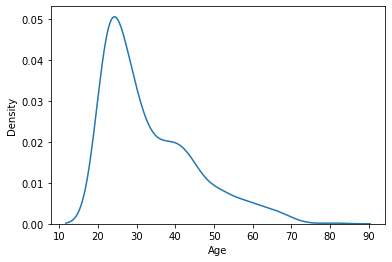

In [75]:
sns.kdeplot(diabetes_df['Age'])

<AxesSubplot:xlabel='Age'>

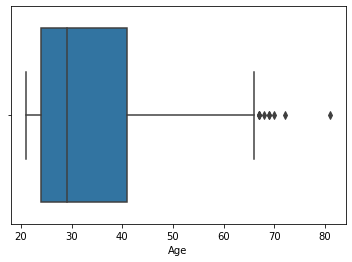

In [76]:
sns.boxplot(x=diabetes_df['Age'])

### 2. Imputation by mean value

In [77]:
diabetes_df['Age'].mean()

33.243489583333336

In [78]:
# to detect extreme outlier
q1=diabetes_df['Age'].quantile(0.25)
q2=diabetes_df['Age'].quantile(0.5)
q3=diabetes_df['Age'].quantile(0.75)
print('Q1 is :',q1)
print('Q2 is :',q2)
print('Q3 is :',q3)

iqr= q3- q1

upper_tail= q3 + 1.5 * iqr
lower_tail= q1 - 1.5 * iqr
print('UpperTail is:',upper_tail)
print('LowerTail is:',lower_tail)

Q1 is : 24.0
Q2 is : 29.0
Q3 is : 41.0
UpperTail is: 66.5
LowerTail is: -1.5


In [82]:
diabetes_df.loc[diabetes_df['Age']>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,132,80,0,0,26.8,0.186,69,0
363,146,78,0,0,38.5,0.520,67,1
453,119,0,0,0,19.6,0.832,72,0
459,134,74,33,60,25.9,0.460,81,0
489,194,80,0,0,26.1,0.551,67,0
537,57,60,0,0,21.7,0.735,67,0
666,145,82,18,0,32.5,0.235,70,1
674,91,82,0,0,35.6,0.587,68,0
684,136,82,0,0,0.0,0.640,69,0


In [84]:
mean_age=diabetes_df.loc[diabetes_df['Age']< upper_tail,'Age'].mean()
mean_age

32.80764163372859

In [85]:
diabetes_df.loc[diabetes_df['Age']>upper_tail]=mean_age

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:xlabel='Age', ylabel='Density'>

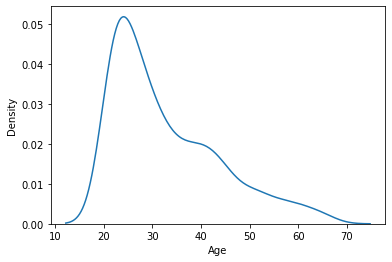

In [87]:
sns.kdeplot(diabetes_df['Age'])

<AxesSubplot:xlabel='Age'>

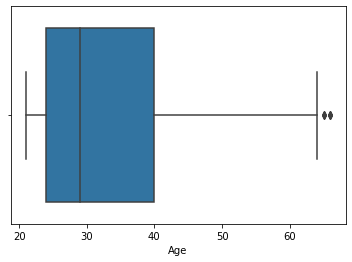

In [88]:
sns.boxplot(x=diabetes_df['Age'])

### 3. upper_tail

In [91]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.describe()
diabetes_df.loc[diabetes_df['Age']>upper_tail]=upper_tail
diabetes_df.loc[diabetes_df['Age']>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### 4. Lower_tail

In [92]:
diabetes_df.loc[diabetes_df['Age']<lower_tail]=lower_tail

In [93]:
diabetes_df.loc[diabetes_df['Age']<lower_tail]=0

# 3. Transformation

### 1. Log Transformation

In [94]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Age'>

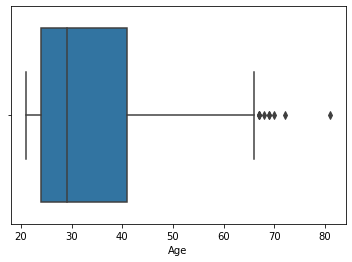

In [95]:
sns.boxplot(x=diabetes_df['Age']) #before trans

<AxesSubplot:xlabel='Age', ylabel='Density'>

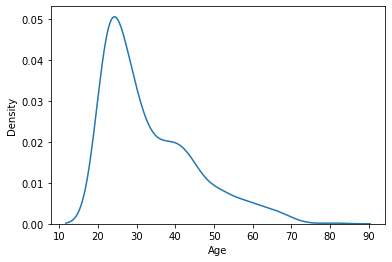

In [96]:
sns.kdeplot(diabetes_df['Age']) #before trans

<AxesSubplot:xlabel='Age', ylabel='Density'>

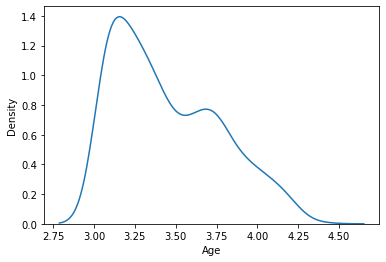

In [97]:
sns.kdeplot(np.log(diabetes_df['Age'])) #after trans

<AxesSubplot:xlabel='Age'>

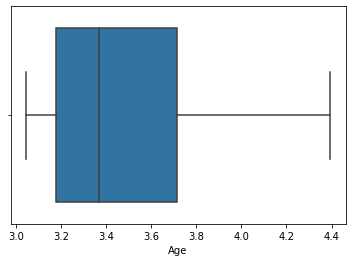

In [98]:
sns.boxplot(x=np.log(diabetes_df['Age']))#after trans

In [99]:
diabetes_df['Age']

0      50
1      31
2      52
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [101]:
a1=np.log(diabetes_df['Age'])  #log,log2,log10
a1

0      3.912023
1      3.433987
2      3.951244
3      3.044522
4      3.496508
         ...   
763    4.143135
764    3.295837
765    3.401197
766    3.850148
767    3.135494
Name: Age, Length: 768, dtype: float64

In [102]:
np.exp(a1)

0      50.0
1      31.0
2      52.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64

## 2. Cube Root Transformation

<AxesSubplot:xlabel='Age'>

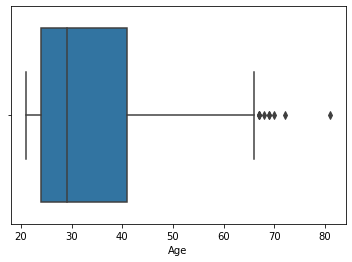

In [103]:
sns.boxplot(x=diabetes_df['Age']) #before trans

<AxesSubplot:xlabel='Age'>

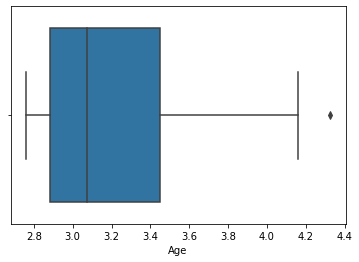

In [104]:
sns.boxplot(x=np.cbrt(diabetes_df['Age']))

## 3. Square Root Transformation

<AxesSubplot:xlabel='Age'>

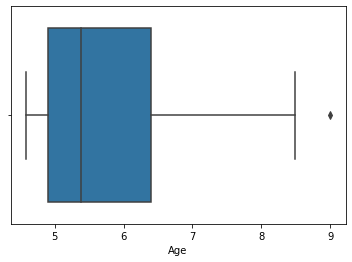

In [105]:
sns.boxplot(x=np.sqrt(diabetes_df['Age']))

## 4. Reciprocal Transformation

<AxesSubplot:xlabel='Age'>

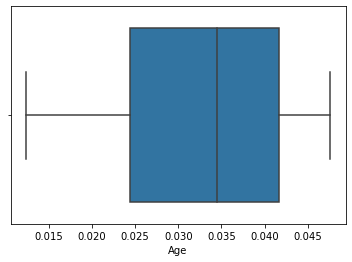

In [106]:
sns.boxplot(x=1/(diabetes_df['Age']))

## 5. Standardization

<AxesSubplot:xlabel='Age'>

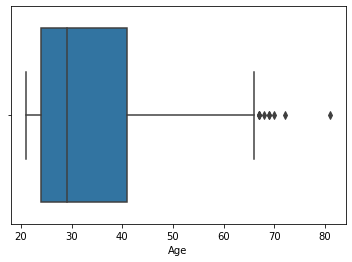

In [107]:
sns.boxplot(x=diabetes_df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

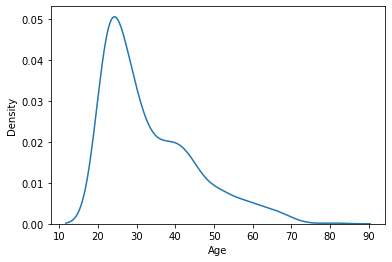

In [108]:
sns.kdeplot(diabetes_df['Age'])

In [109]:
z_score_values=zscore(diabetes_df['Age'])
z_score_values

0      1.426022
1     -0.190927
2      1.596227
3     -1.041953
4     -0.020722
         ...   
763    2.532356
764   -0.531337
765   -0.276029
766    1.170715
767   -0.871747
Name: Age, Length: 768, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

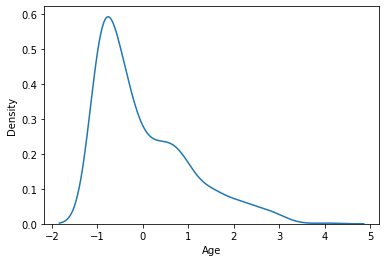

In [110]:
sns.kdeplot(z_score_values)

## Box Cox Transformation

In [111]:
from scipy.stats import boxcox

<AxesSubplot:ylabel='Density'>

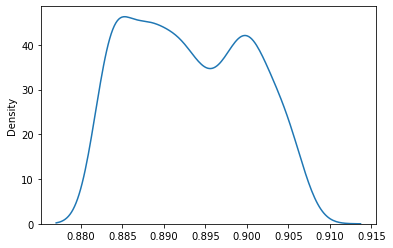

In [116]:
age_array=boxcox(diabetes_df['Age'])[0]
sns.kdeplot(age_array)

<AxesSubplot:>

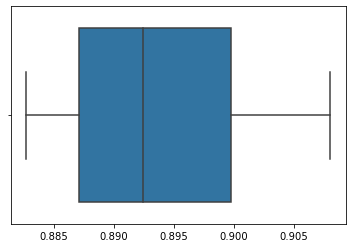

In [115]:
sns.boxplot(x=age_array)